Nama : Ameliani Kusmayadi

NIM : 1103213044

Kelas : TK-45-06

# Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Memuat dataset
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/50_Startups.csv')

# Menampilkan 5 baris pertama dataset
print(dataset.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [4]:
# Memisahkan fitur (semua kolom kecuali Profit) dan target (Profit)
X = dataset.iloc[:, :-1].values  # Semua kolom kecuali kolom terakhir (Profit)
Y = dataset.iloc[:, -1].values   # Kolom terakhir (Profit)

# Mengubah fitur kategori 'State' menjadi variabel dummy menggunakan OneHotEncoder
# ColumnTransformer digunakan untuk menerapkan OneHotEncoder hanya pada kolom kategori

ct = ColumnTransformer([("encoder", OneHotEncoder(), [3])], remainder='passthrough')
X = ct.fit_transform(X)

# Menghindari variable dummy trap dengan menghilangkan satu kolom dummy (untuk menghindari multikolinearitas)
X = X[:, 1:]

# Menampilkan hasil transformasi
print(X[:5])  # Menampilkan 5 baris pertama dari X setelah encoding

[[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 142107.34 91391.77 366168.42]]


In [5]:
# Memisahkan data menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [6]:
# Membuat model regresi linear
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [7]:
# Memprediksi hasil pada data uji
Y_pred = regressor.predict(X_test)

# Menampilkan perbandingan antara prediksi dan hasil sebenarnya
comparison = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print(comparison)

      Actual      Predicted
0  103282.38  103015.201598
1  144259.40  132582.277608
2  146121.95  132447.738452
3   77798.83   71976.098513
4  191050.39  178537.482211
5  105008.31  116161.242302
6   81229.06   67851.692097
7   97483.56   98791.733747
8  110352.25  113969.435330
9  166187.94  167921.065696


In [8]:
# Menghitung Mean Squared Error, Root Mean Squared Error, dan R-squared
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Menampilkan hasil evaluasi
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 83502864.03250548
Root Mean Squared Error (RMSE): 9137.990152791011
R-squared (R²): 0.9347068473282987


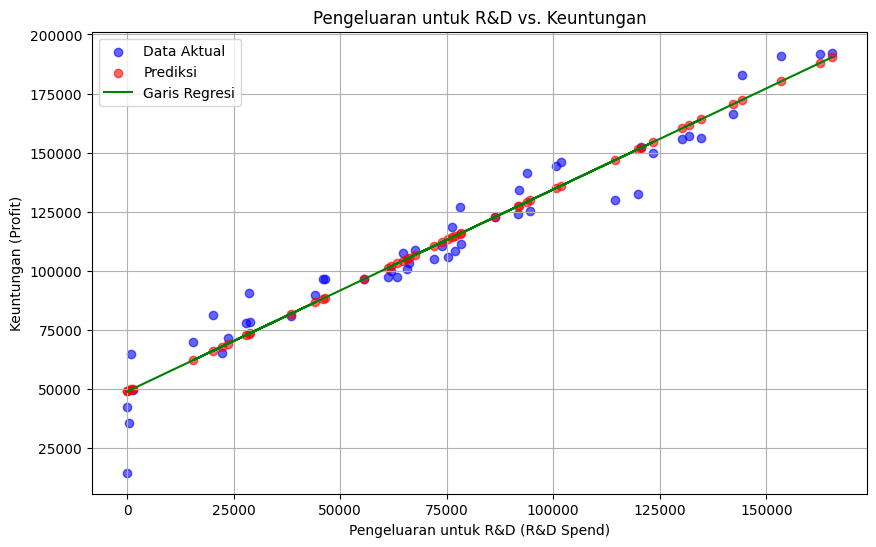

In [10]:
# 1. Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 2. Baca dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/50_Startups.csv')

# 3. Pilih kolom yang diperlukan
rd_spend = df['R&D Spend']
profit = df['Profit']

# 4. Hitung koefisien regresi linier
m, b = np.polyfit(rd_spend, profit, 1)

# 5. Hitung prediksi menggunakan regresi linier
predictions = m * rd_spend + b

# 6. Buat grafik scatter
plt.figure(figsize=(10, 6))
plt.scatter(rd_spend, profit, color='blue', alpha=0.6, label='Data Aktual')  # Titik biru
plt.scatter(rd_spend, predictions, color='red', alpha=0.6, label='Prediksi')  # Titik merah
plt.plot(rd_spend, predictions, color='green', label='Garis Regresi')  # Garis regresi
plt.title('Pengeluaran untuk R&D vs. Keuntungan')
plt.xlabel('Pengeluaran untuk R&D (R&D Spend)')
plt.ylabel('Keuntungan (Profit)')
plt.grid(True)
plt.legend()
plt.show()